# Systematic Investment Plan (SIP)
回測定期定額報酬率

<AxesSubplot:xlabel='Date'>

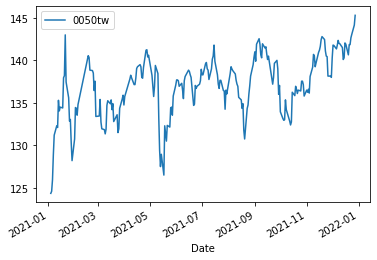

In [1]:
import ffn
import pandas as pd

ETF0050 = ffn.get('0050.TW', start='2021-01-01')

%matplotlib inline
ETF0050.plot()

In [2]:
pmt = 10000

ETF0050 = ETF0050.resample('M').last()
# ETF0050['unit'] = pmt/ETF0050['0050tw']

total_cost_list = []
total_cost = 0
for i in range(len(ETF0050)):
    total_cost += pmt
    total_cost_list.append(total_cost)
ETF0050['total_cost'] = total_cost_list

total_unit_list = []
total_unit = 0
for i in range(len(ETF0050)):
    total_unit += pmt/ETF0050['0050tw'][i]
    total_unit_list.append(total_unit)
ETF0050['total_unit'] = total_unit_list

ETF0050['return_rate'] = ETF0050['0050tw'] * ETF0050['total_unit'] / ETF0050['total_cost'] -1

ETF0050

,0050tw,total_cost,total_unit,return_rate
Date,,,,
2021-01-31,128.199997,10000,78.003122,0.000000
2021-02-28,133.399994,20000,152.965644,0.020281
2021-03-31,134.750000,30000,227.177147,0.020404
2021-04-30,140.600006,40000,298.300899,0.048528
2021-05-31,137.100006,50000,371.240356,0.017941
2021-06-30,138.949997,60000,443.208692,0.026397
2021-07-31,136.050003,70000,516.711079,0.004265
2021-08-31,140.350006,80000,587.961521,0.031505
2021-09-30,137.050003,90000,660.927590,0.006446


<AxesSubplot:xlabel='Date'>

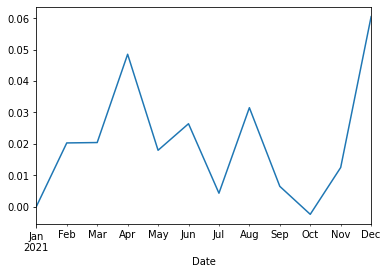

In [3]:
ETF0050['return_rate'].plot()

## 定期定額 vs. 單筆投資

In [4]:
def sip(stock, pmt, startdate):
    data = ffn.get(stock, start=startdate)
    pmt = pmt
    data = data.resample('M').last()
    data.columns = ['price']
    
    total_cost_list = []
    total_cost = 0
    for i in range(len(data)):
        total_cost += pmt
        total_cost_list.append(total_cost)
    data['total_cost'] = total_cost_list
    
    total_unit_list = []
    total_unit = 0
    for i in range(len(data)):
        total_unit += pmt/data['price'][i]
        total_unit_list.append(total_unit)
    data['total_unit'] = total_unit_list

    data['return_rate'] = data['price'] * data['total_unit'] / data['total_cost'] - 1
    print(data)
    
    returnrate1 = '定期定額報酬率: {}'.format(data['return_rate'][-1])
    returnrate2 = '單筆投資報酬率: {}'.format(data['total_cost'][-1] / data['price'][0] * data['price'][-1] / data['total_cost'][-1] -1)
    
    return returnrate1, returnrate2

In [5]:
sip('0050.TW', 10000, '2021-01-01')

                 price  total_cost  total_unit  return_rate
Date                                                       
2021-01-31  128.199997       10000   78.003122     0.000000
2021-02-28  133.399994       20000  152.965644     0.020281
2021-03-31  134.750000       30000  227.177147     0.020404
2021-04-30  140.600006       40000  298.300899     0.048528
2021-05-31  137.100006       50000  371.240356     0.017941
2021-06-30  138.949997       60000  443.208692     0.026397
2021-07-31  136.050003       70000  516.711079     0.004265
2021-08-31  140.350006       80000  587.961521     0.031505
2021-09-30  137.050003       90000  660.927590     0.006446
2021-10-31  135.800003      100000  734.565291    -0.002460
2021-11-30  138.000000      110000  807.029059     0.012455
2021-12-31  145.300003      120000  875.852182     0.060511


('定期定額報酬率: 0.06051103971612837', '單筆投資報酬率: 0.13338538619793683')

In [6]:
sip('006208.TW', 10000, '2021-01-01')

                price  total_cost   total_unit  return_rate
Date                                                       
2021-01-31  73.550003       10000   135.961925     0.000000
2021-02-28  77.449997       20000   265.077489     0.026513
2021-03-31  77.349998       30000   394.359973     0.016791
2021-04-30  80.750000       40000   518.198983     0.046114
2021-05-31  78.900002       50000   644.941692     0.017718
2021-06-30  79.900002       60000   770.098136     0.025514
2021-07-31  78.300003       70000   897.812051     0.004267
2021-08-31  80.800003       80000  1021.574423     0.031790
2021-09-30  78.550003       90000  1148.881866     0.002719
2021-10-31  78.150002      100000  1276.840916    -0.002149
2021-11-30  77.900002      110000  1405.210618    -0.004855
2021-12-31  81.699997      120000  1527.609644     0.040048


('定期定額報酬率: 0.04004752694700153', '單筆投資報酬率: 0.1108088859051326')